# Weather Project
The purpose of this project is to compare the amount of rain in Seattle, WA to that in Norwich, CT. I grew up in Norwich, CT, and I now live in the Seattle area. My family believes that it rains more in Seattle than it does in Norwich. However, since I've lived in this area, there have been many summers with droughts. I don't remember ever having a drought in Norwich. I also remember heavier rain in Norwich than I usually experience in the Seattle area. Norwich also sometimes experienced hurricanes when I was growing up. I plan to explore different ways of measuring whether it rains more in Seattle or in Norwich, but the main question I want to answer is whether over the period from 2018 to 2022 Norwich had more average rainfall than Seattle.

The data was originally obtained from the National Centers for Environmental Information NOAA Climate Data Online Search tool at https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND. The Norwich data was obtained directly from there. The Seattle data was obtained from Dr. Brian Fischer's GitHub at https://github.com/brian-fischer/DATA-5100/tree/main/weather.

## Load and Explore the Data

The following code block imports the libraries and sets the plotting style.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

Next the data for Seattle will be loaded.

In [3]:
# Load the Seattle data
df_seattle = pd.read_csv(r"C:\Users\jenpo\Documents\Jen\Seattle University\DATA 5100 Foundations of Data Science\weather\data\seattle_rain.csv")
type(df_seattle)

pandas.core.frame.DataFrame

Next the data for Norwich will be loaded.

In [4]:
# Load the Norwich data
df_norwich = pd.read_csv(r"C:\Users\jenpo\Documents\Jen\Seattle University\DATA 5100 Foundations of Data Science\weather\data\Norwich_rain.csv")
type(df_norwich)

pandas.core.frame.DataFrame

Get a preview of the data in the first five rows of the Seattle dataframes.

In [5]:
df_seattle.head()

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN


There are a lot of null values in the data. The data needed for this project is the date and precipitation, which seem to have fewer null values.

Next preview the first five rows of the Norwich dataframe.

In [6]:
df_norwich.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1CTNL0010,"NORWICH 2.5 NNE, CT US",41.584855,-72.076749,93.0,2018-01-01,NaN,NaN,0.0,0.0,2.0
1,US1CTNL0010,"NORWICH 2.5 NNE, CT US",41.584855,-72.076749,93.0,2018-01-02,NaN,NaN,0.0,0.0,2.0
2,US1CTNL0010,"NORWICH 2.5 NNE, CT US",41.584855,-72.076749,93.0,2018-01-03,NaN,NaN,0.0,0.0,2.0
3,US1CTNL0010,"NORWICH 2.5 NNE, CT US",41.584855,-72.076749,93.0,2018-01-04,NaN,NaN,0.0,0.0,2.0
4,US1CTNL0010,"NORWICH 2.5 NNE, CT US",41.584855,-72.076749,93.0,2018-01-05,NaN,NaN,0.9,10.8,12.5


The Norwich dataframe also appears to have data for the date and precipitation. Some of the columns are different than the columns in the Seattle dataframe, but these are columns that are not needed for this project.

Next use info() to examine the Seattle dataframe in more depth.

In [7]:
df_seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  1658 non-null   object 
 1   NAME     1658 non-null   object 
 2   DATE     1658 non-null   object 
 3   DAPR     23 non-null     float64
 4   MDPR     23 non-null     float64
 5   PRCP     1636 non-null   float64
 6   SNOW     353 non-null    float64
 7   SNWD     66 non-null     float64
 8   WESD     15 non-null     float64
 9   WESF     28 non-null     float64
dtypes: float64(7), object(3)
memory usage: 129.7+ KB


There are fewer null values in the precipitation column than in some of the other columns.

Next examine the Norwich dataframe in more depth.

In [8]:
df_norwich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    3652 non-null   object 
 1   NAME       3652 non-null   object 
 2   LATITUDE   3652 non-null   float64
 3   LONGITUDE  3652 non-null   float64
 4   ELEVATION  3652 non-null   float64
 5   DATE       3652 non-null   object 
 6   DAPR       2 non-null      float64
 7   MDPR       2 non-null      float64
 8   PRCP       3636 non-null   float64
 9   SNOW       3640 non-null   float64
 10  SNWD       3634 non-null   float64
dtypes: float64(8), object(3)
memory usage: 314.0+ KB


There are fewer null values in the precipitation column than in some of the columns that are not needed for this project.
The Norwich dataframe has more rows than the Seattle dataframe.

#### Prepare the Norwich and Seattle data so it is comparable

Examine the number of stations where data was collected in each city, starting with Norwich.

In [9]:
df_norwich['STATION']

0       US1CTNL0010
1       US1CTNL0010
2       US1CTNL0010
3       US1CTNL0010
4       US1CTNL0010
           ...     
3647    USC00065910
3648    USC00065910
3649    USC00065910
3650    USC00065910
3651    USC00065910
Name: STATION, Length: 3652, dtype: object

There appear to be at least two stations in the Norwich data.

Check to see the values of the unique stations in the data.

In [10]:
df_norwich['STATION'].unique()

array(['US1CTNL0010', 'USC00065910'], dtype=object)

Yes, there are two unique stations in the Norwich data.

Check the number of unique stations, mostly for practice using Python.

In [11]:
df_norwich['STATION'].nunique()

2

Yes, it's confirmed again that there are 2 unique stations in the Norwich data.

Confirm the number of stations in the Seattle data.

In [12]:
df_seattle['STATION'].nunique()

1

There is one unique station in the Seattle data. 

Examine the dates when the Norwich data was collected to ensure that it was all between 2018 and 2022.

In [13]:
df_norwich['DATE']

0       2018-01-01
1       2018-01-02
2       2018-01-03
3       2018-01-04
4       2018-01-05
           ...    
3647    2022-12-27
3648    2022-12-28
3649    2022-12-29
3650    2022-12-30
3651    2022-12-31
Name: DATE, Length: 3652, dtype: object

The data looks like it was all collected in 2018 through 2022.

Examine the dates when the Seattle data was collected to ensure that it was all between 2018 and 2022.

In [14]:
df_seattle['DATE']

0         1/1/18
1         1/2/18
2         1/3/18
3         1/4/18
4         1/5/18
          ...   
1653    12/27/22
1654    12/28/22
1655    12/29/22
1656    12/30/22
1657    12/31/22
Name: DATE, Length: 1658, dtype: object

It also appears that the Seattle data was collected in 2018 through 2022.

Change the Seattle date column to datetime data type so we can work with it more accurately.

In [15]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])

C:\Users\jenpo\AppData\Local\Temp\ipykernel_23996\3087519436.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])


There is an error in the Seattle transformation because Python is unsure about what the format was, but we will see blow that the data was transformed correctly.

Change the Norwich date column to datetime data type so we can work with it more accurately.

In [16]:
df_norwich['DATE'] = pd.to_datetime(df_norwich['DATE'])

The Norwich data transfomation does not produce an error. 

Check the date columns for both cities and confirm that the data type change was made.

In [17]:
df_seattle['DATE']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1653   2022-12-27
1654   2022-12-28
1655   2022-12-29
1656   2022-12-30
1657   2022-12-31
Name: DATE, Length: 1658, dtype: datetime64[ns]

In [18]:
df_norwich['DATE']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
3647   2022-12-27
3648   2022-12-28
3649   2022-12-29
3650   2022-12-30
3651   2022-12-31
Name: DATE, Length: 3652, dtype: datetime64[ns]

The dtype is now datetime for both sets of data.

Double check that the date range for each city is as expected.

In [19]:
df_seattle['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

In [20]:
df_norwich['DATE'].agg(['min', 'max'])

min   2018-01-01
max   2022-12-31
Name: DATE, dtype: datetime64[ns]

The date range is correct for both sets of data.

Make a line plot of the precipitation for Seattle to ensure we have the data we need for our project.

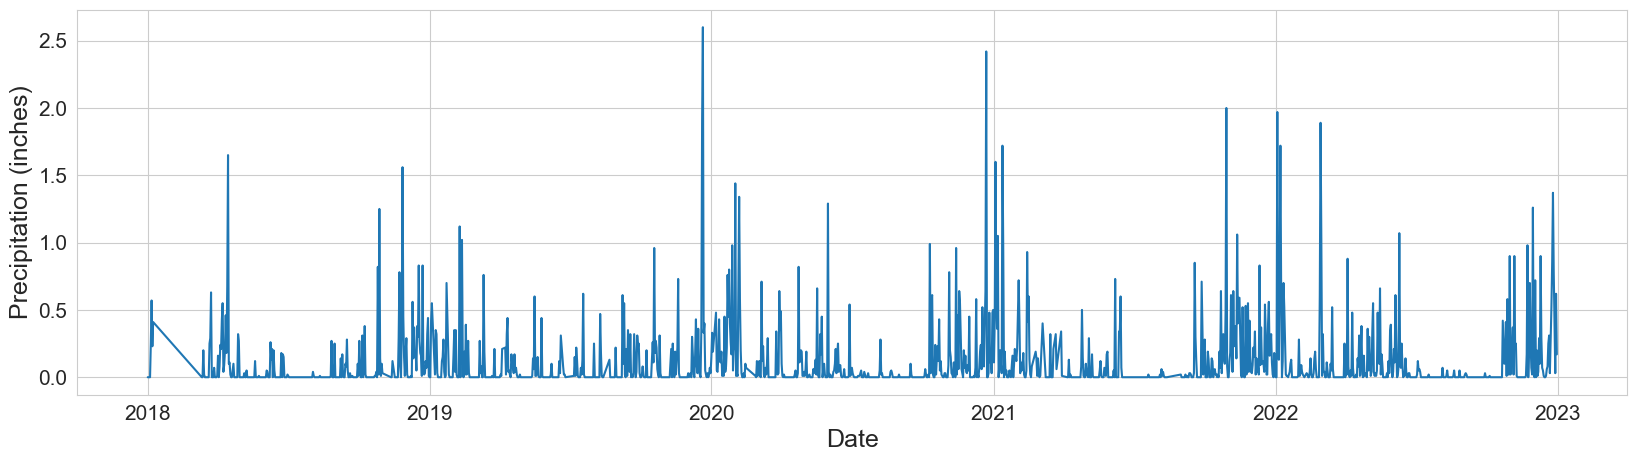

In [21]:
# Plot the daily precipitation data for Seattle.
plt.figure(figsize=(20, 5))
sns.lineplot(data = df_seattle, x = 'DATE', y = 'PRCP')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Precipitation (inches)', fontsize = 18)
plt.tick_params(labelsize = 15)
plt.show()

It's visible in the line plot that there is some data missing in 2018, but overall it looks like we have the data we need.

Make a line plot of the precipitation for Norwich to ensure we have the data we need for our project.

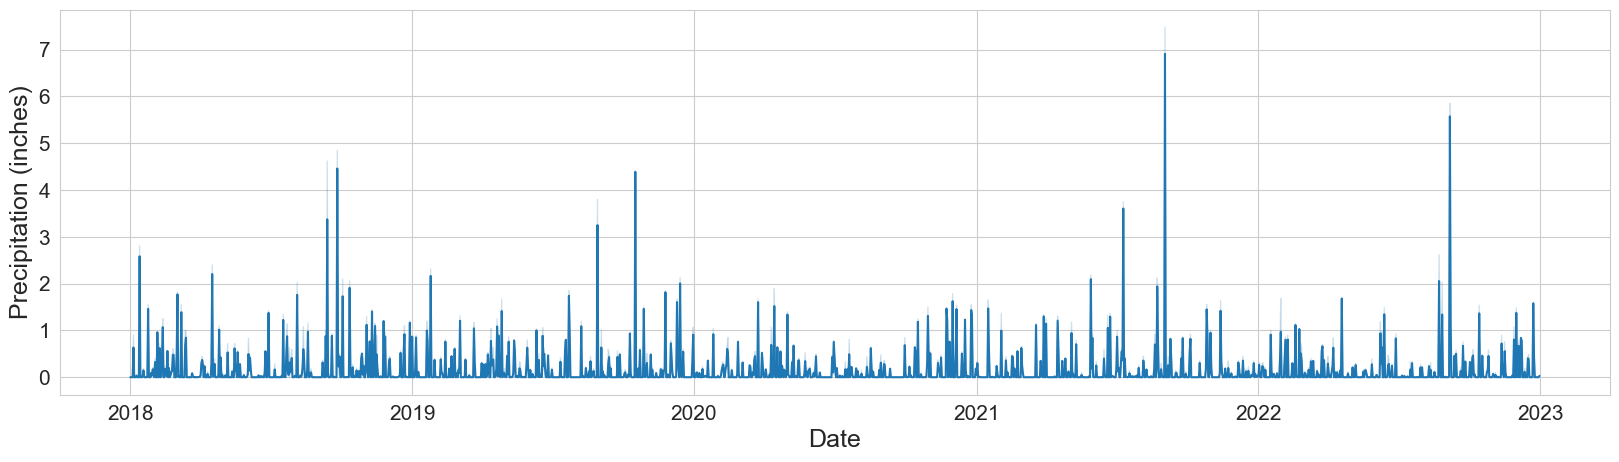

In [22]:
# Plot the daily precipitation data for Norwich.
plt.figure(figsize=(20, 5))
sns.lineplot(data = df_norwich, x = 'DATE', y = 'PRCP')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Precipitation (inches)', fontsize = 18)
plt.tick_params(labelsize = 15)
plt.show()

Based on the line plot, it looks like we have the data that we need for Norwich.

Norwich has data from two stations, and Seattle has data from one. Next find the name of the stations where the Norwich data was collected.

In [23]:
df_norwich['NAME']

0                    NORWICH 2.5 NNE, CT US
1                    NORWICH 2.5 NNE, CT US
2                    NORWICH 2.5 NNE, CT US
3                    NORWICH 2.5 NNE, CT US
4                    NORWICH 2.5 NNE, CT US
                       ...                 
3647    NORWICH PUBLIC UTILITY PLANT, CT US
3648    NORWICH PUBLIC UTILITY PLANT, CT US
3649    NORWICH PUBLIC UTILITY PLANT, CT US
3650    NORWICH PUBLIC UTILITY PLANT, CT US
3651    NORWICH PUBLIC UTILITY PLANT, CT US
Name: NAME, Length: 3652, dtype: object

It still shows two stations.

Remove extra station from Norwich data, and ensure it was removed.

In [24]:
df_norwich = df_norwich.loc[df_norwich['NAME'] == 'NORWICH PUBLIC UTILITY PLANT, CT US']
df_norwich['STATION'].unique()

array(['USC00065910'], dtype=object)

The Norwich dataframe now shows one unique station in the data.

Rename the Norwich precipitation column so that it will be more clear which column is Norwich and which column is Seattle after we join the dataframes.

In [25]:
# Rename PRCP 
df_norwich = df_norwich.rename(columns = {'PRCP': 'PRCP_N'})
df_norwich.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,MDPR,PRCP_N,SNOW,SNWD
1826,USC00065910,"NORWICH PUBLIC UTILITY PLANT, CT US",41.5268,-72.06517,6.1,2018-01-01,NaN,NaN,0.00,0.0,0.0
1827,USC00065910,"NORWICH PUBLIC UTILITY PLANT, CT US",41.5268,-72.06517,6.1,2018-01-02,NaN,NaN,0.00,0.0,1.0
1828,USC00065910,"NORWICH PUBLIC UTILITY PLANT, CT US",41.5268,-72.06517,6.1,2018-01-03,NaN,NaN,0.00,0.0,1.0
1829,USC00065910,"NORWICH PUBLIC UTILITY PLANT, CT US",41.5268,-72.06517,6.1,2018-01-04,NaN,NaN,0.00,0.2,1.0
1830,USC00065910,"NORWICH PUBLIC UTILITY PLANT, CT US",41.5268,-72.06517,6.1,2018-01-05,NaN,NaN,0.37,12.0,12.0


The Norwich precipitation column as been renamed PRCP_N.

#### Merge the data into one dataframe

Merge the Norwich dataframe and the Seattle dataframe into one dataframe on the data column using an outer merge and just keeping the columns needed for the project.

In [26]:
df = df_norwich[['DATE', 'PRCP_N']].merge(df_seattle[['DATE', 'PRCP']], on = 'DATE', how = 'outer')
df.head()

,DATE,PRCP_N,PRCP
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,0.37,0.25


The df has been merged.

Change the data into a tidy format and check the head and tail.

In [27]:
df = pd.melt(df, id_vars = 'DATE', var_name = 'city', value_name = 'precipitation')
df.head()

,DATE,city,precipitation
0,2018-01-01,PRCP_N,0.00
1,2018-01-02,PRCP_N,0.00
2,2018-01-03,PRCP_N,0.00
3,2018-01-04,PRCP_N,0.00
4,2018-01-05,PRCP_N,0.37


In [28]:
df.tail()

,DATE,city,precipitation
3647,2022-12-27,PRCP,0.78
3648,2022-12-28,PRCP,0.40
3649,2022-12-29,PRCP,0.03
3650,2022-12-30,PRCP,0.62
3651,2022-12-31,PRCP,0.17


The data appears to have merged correctly.

Change the city names to that of the city where the precipitation was measured and view the first five rows and last five rows of the dataframe.

In [29]:
df.loc[df['city'] == 'PRCP_N', 'city'] = 'Norwich'
df.loc[df['city'] == 'PRCP', 'city'] = 'Seattle'
df.head()

,DATE,city,precipitation
0,2018-01-01,Norwich,0.00
1,2018-01-02,Norwich,0.00
2,2018-01-03,Norwich,0.00
3,2018-01-04,Norwich,0.00
4,2018-01-05,Norwich,0.37


In [30]:
df.tail()

,DATE,city,precipitation
3647,2022-12-27,Seattle,0.78
3648,2022-12-28,Seattle,0.40
3649,2022-12-29,Seattle,0.03
3650,2022-12-30,Seattle,0.62
3651,2022-12-31,Seattle,0.17


The names appear to have been changed correctly.

Change the 'DATE' column name to 'date' so all column names are lowercase.

In [31]:
df = df.rename(columns = {'DATE': 'date'})
df.head()

,date,city,precipitation
0,2018-01-01,Norwich,0.00
1,2018-01-02,Norwich,0.00
2,2018-01-03,Norwich,0.00
3,2018-01-04,Norwich,0.00
4,2018-01-05,Norwich,0.37


The column names are all consistent and lowercase.

#### Impute data to replace the null values

Prepare to deal with the null values. Check the number of null values a few different ways, mostly to practice.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3652 non-null   datetime64[ns]
 1   city           3652 non-null   object        
 2   precipitation  3446 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 85.7+ KB


In [33]:
df.notna().sum()

date             3652
city             3652
precipitation    3446
dtype: int64

In [34]:
df.isna().sum()

date               0
city               0
precipitation    206
dtype: int64

There are null values that we will have to deal with. 

How many precipitation null values does Seattle have?

In [35]:
df.loc[df['city'] == 'Seattle', 'precipitation'].isna().sum()

np.int64(190)

There are 190 null values in the Seattle data.

How many precipitation null values does Norwich have?

In [36]:
df.loc[df['city'] == 'Norwich', 'precipitation'].isna().sum()

np.int64(16)

There are 16 null values in the Norwich data. This number and the Seattle number are both consistent with what we saw in the line plots of the cities' precipitation data earlier.

To deal with the null values, for each city, replace null values with the mean of the precipitation value for that day over every year included in the data.

First define a column that labels each day by the number of day it is within the year, starting with January 1 as 1.

In [37]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year
df.head()

,date,city,precipitation,day_of_year
0,2018-01-01,Norwich,0.00,1
1,2018-01-02,Norwich,0.00,2
2,2018-01-03,Norwich,0.00,3
3,2018-01-04,Norwich,0.00,4
4,2018-01-05,Norwich,0.37,5


The day_of_year column appears to have been successfully created.

Compute the mean precipitation for each day in Seattle, averaged across the years we have data for

In [38]:
mean_day_precipitation = df.loc[
    df['city'] == 'Seattle',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()
mean_day_precipitation.head()


,precipitation
day_of_year,
1,0.052000
2,0.150000
3,0.836000
4,0.370000
5,0.246667


The mean precipitation appears to have been computed correctly.

Create a line plot of mean_day_precipitation.

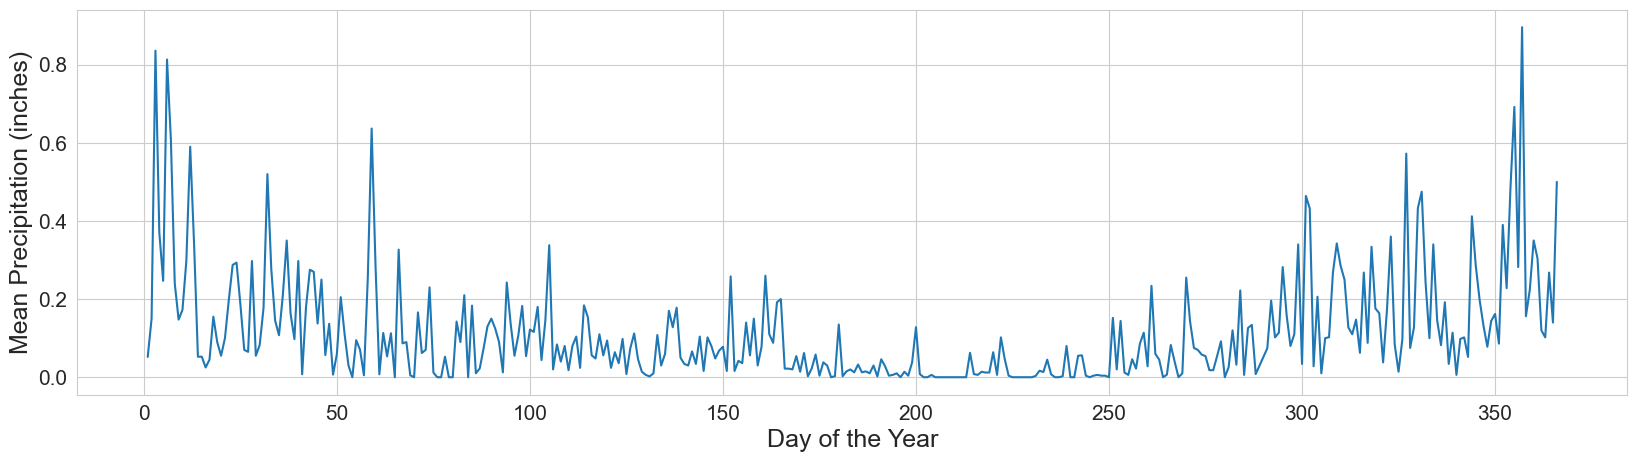

In [39]:
plt.figure(figsize = (20, 5))
sns.lineplot(data = mean_day_precipitation, x = 'day_of_year', y = 'precipitation')
plt.xlabel('Day of the Year', fontsize = 18)
plt.ylabel('Mean Precipitation (inches)', fontsize = 18)
plt.tick_params(labelsize = 15)
plt.show()


This line plot makes sense when compared to the earlier line plot of the precipitation in Seattle.

Next find the index of each row in the Seattle data where the precipitation value is missing because it is recorded as NaN.

In [40]:
indices_Seattle = np.where((df['city'] == 'Seattle') & (df['precipitation'].isna() == True))[0]

In [41]:
indices_Seattle

array([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
       1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
       1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133,
       2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214,
       2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362,
       2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520,
       2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974, 2975, 2983,
       2984, 2986, 2987, 2988, 3000, 3001, 3004, 30

We appear to have the indices of the rows where the Seattle precipitation data is missing. 

Replace each missing value with the mean on that day. Check to ensure that there are no more null values for Seattle precipitation.

In [42]:

for index in indices_Seattle:
    df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index, 'day_of_year']].values[0]


df.loc[df['city'] == 'Seattle', 'precipitation'].isna().sum()

np.int64(0)

It appears that there are no more null values in the Seattle data.

Now compute the mean precipitation for each day in Norwich, averaged across years and view the first five rows.

In [43]:

mean_day_precipitation_n = df.loc[
    df['city'] == 'Norwich',
    ['precipitation', 'day_of_year']
].groupby(
    'day_of_year'
).mean()
mean_day_precipitation_n.head()


,precipitation
day_of_year,
1,0.186
2,0.094
3,0.000
4,0.024
5,0.124


It appears that mean_day_precipitation_n was created correctly.

Create the line plot of mean_day_precipitation_n.

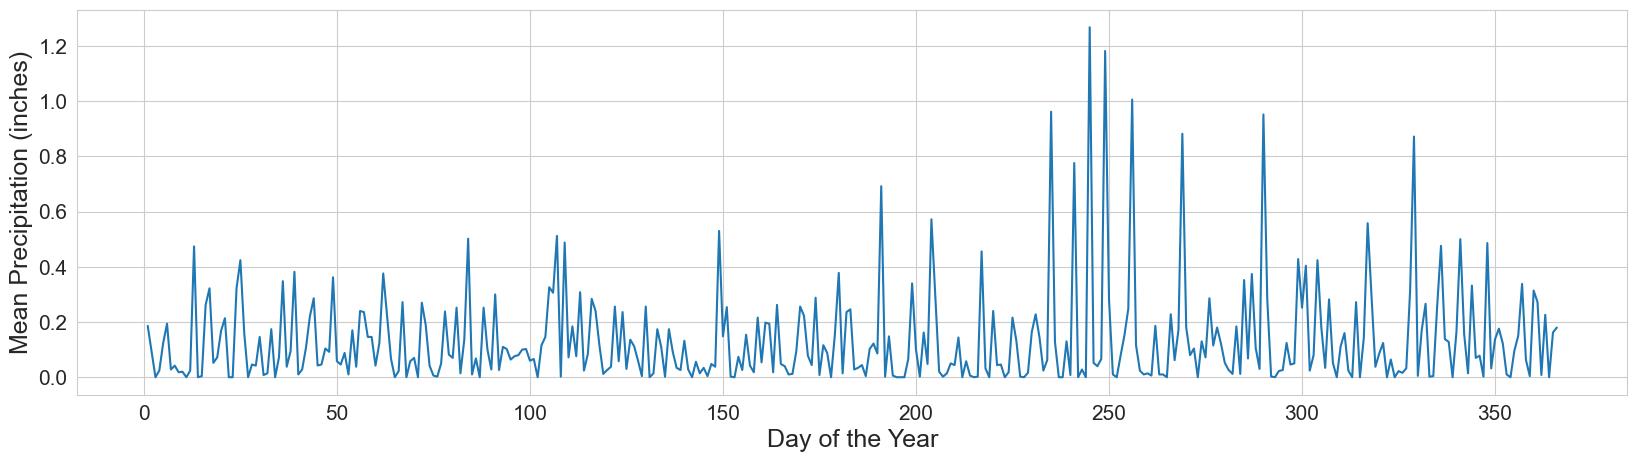

In [44]:
# Create line plot of mean_day_precipitation_n
plt.figure(figsize = (20, 5))
sns.lineplot(data = mean_day_precipitation_n, x = 'day_of_year', y = 'precipitation')
plt.xlabel('Day of the Year', fontsize = 18)
plt.ylabel('Mean Precipitation (inches)', fontsize = 18)
plt.tick_params(labelsize = 15)
plt.show()

The line plot makes sense when compared to the earlier line plot of Norwich precipitation.

Confirm the number of null values for the Norwich data.

In [45]:

df.loc[df['city'] == 'Norwich', 'precipitation'].isna().sum()

np.int64(16)

There are 16 null values that need to be replaced.

To replace the null values with the mean value for that day of the year, we will begin by finding the index of each row where the Norwich precipitation value is missing beecause it is recorded as NaN

In [46]:

indices_Norwich = np.where((df['city'] == 'Norwich') & (df['precipitation'].isna() == True))[0]
indices_Norwich

array([ 563,  564,  658, 1081, 1082, 1122, 1347, 1453, 1505, 1514, 1734,
       1737, 1738, 1751, 1752, 1790])

The array appears to have been created.

Replace each missing Norwich precipitation value with the mean on that day. Then check to see that it has been done.

In [47]:

for index in indices_Norwich:
    df.loc[index, 'precipitation'] = mean_day_precipitation_n.loc[df.loc[index, 'day_of_year']].values[0]


df.loc[df['city'] == 'Norwich', 'precipitation'].isna().sum()

np.int64(0)

There are no more null values in the Norwich data in the merged dataframe.

Download the clean data file to the data folder in the weather folder, and confirm that it was downloaded.

In [50]:
df.to_csv(r"C:\Users\jenpo\Documents\Jen\Seattle University\DATA 5100 Foundations of Data Science\weather\data\clean_Seattle_Norwich_weather.csv", encoding = 'utf-8-sig', index = False)
print('saved to file')

saved to file


## Exploratory Data 

Using the clean, raw data, make a line plot for precipitation across time for both cities, with the cities represented by different colors.

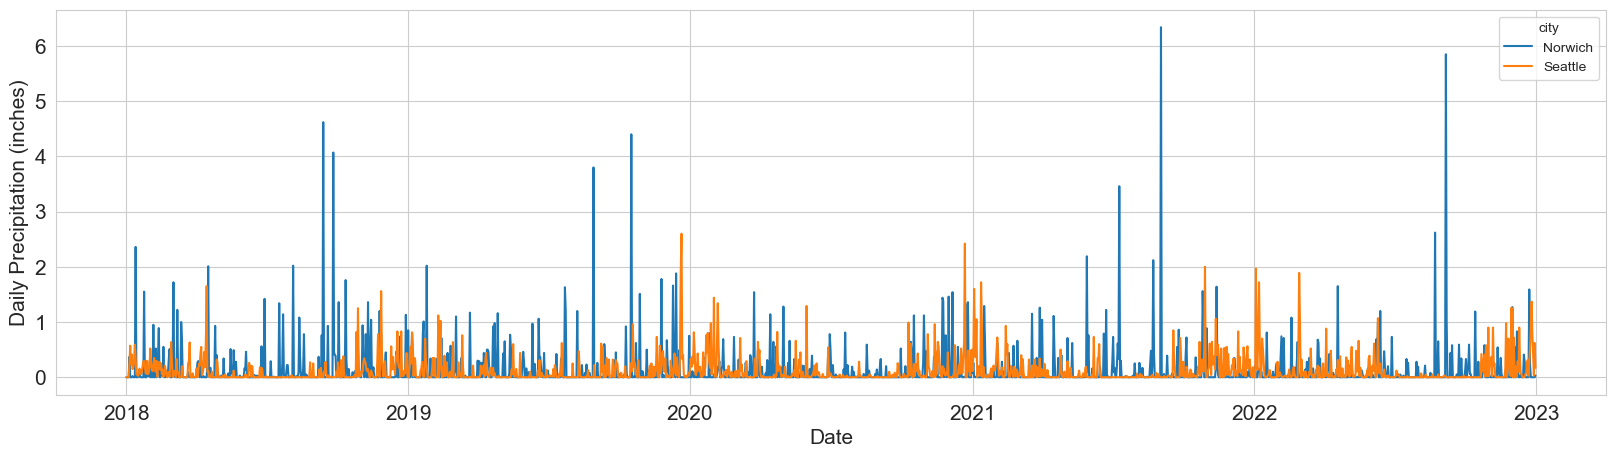

In [49]:
plt.figure(figsize = (20, 5))

sns.lineplot(data = df, x = 'date', y = 'precipitation', hue = 'city')

plt.xlabel('Date', fontsize = 15)
plt.ylabel('Daily Precipitation (inches)', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.show()

It's interesting that when it rains a lot in Norwich, it rains a lot more than any day in Seattle.

Compute basic numerical summaries for precipitation in both cities. Group by city, then show the computations.

In [52]:
df[['city', 'precipitation']].groupby('city').describe()

precipitation                                                
                count      mean       std  min  25%   50%   75%   max
city                                                                 
Norwich        1826.0  0.135702  0.414794  0.0  0.0  0.00  0.06  6.34
Seattle        1826.0  0.113270  0.240516  0.0  0.0  0.01  0.12  2.60

The mean daily rainfall is greater in Norwich. I would not have expected that when I started the project, but it's not that surprising after seeing the line plot above. The days when Norwich gets a lot of rain are going to bring up the mean. The standard deviation is also larger in Norwich, which makes sense since on its rainist days it gets significantly more rain than Seattle gets any day. The median for both is very low, but slighly higher in Seattle.

Compare the mean precipitation in both cities, mostly for practice.

In [54]:
df[['city', 'precipitation']].groupby('city').mean()

,precipitation
city,
Norwich,0.135702
Seattle,0.113270


This shows the same numbers as above.

Create a bar plot of the mean daily precipitation.

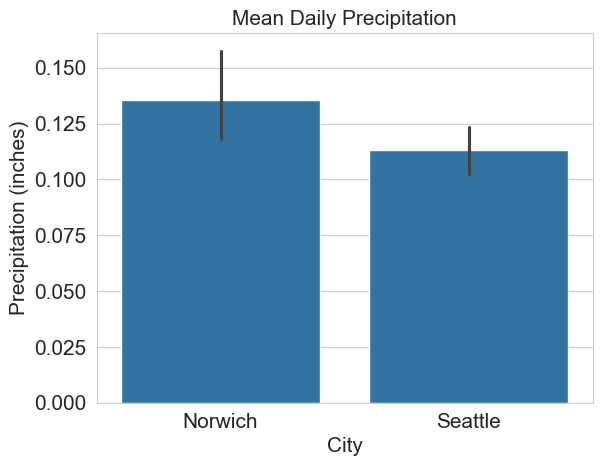

In [55]:
sns.barplot(data = df, x = 'city', y = 'precipitation')

plt.xlabel('City', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)
plt.title('Mean Daily Precipitation', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.show()

This graph shows compares the mean average daily rainfall of the two cities. The error bar is a confidence interval. Norwich has more mean daily precipitation than Seattle.

#### Precipitation by Month

To compare the precipitation by month, first add a column to the dataframe with the number of the month. View the first five rows of the dataframe to ensure that the column was created.

In [56]:
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,date,city,precipitation,day_of_year,month
0,2018-01-01,Norwich,0.00,1,1
1,2018-01-02,Norwich,0.00,2,1
2,2018-01-03,Norwich,0.00,3,1
3,2018-01-04,Norwich,0.00,4,1
4,2018-01-05,Norwich,0.37,5,1


The month column was created.

Plot the distributuion of the precipitation by month for both cities using a boxplot.

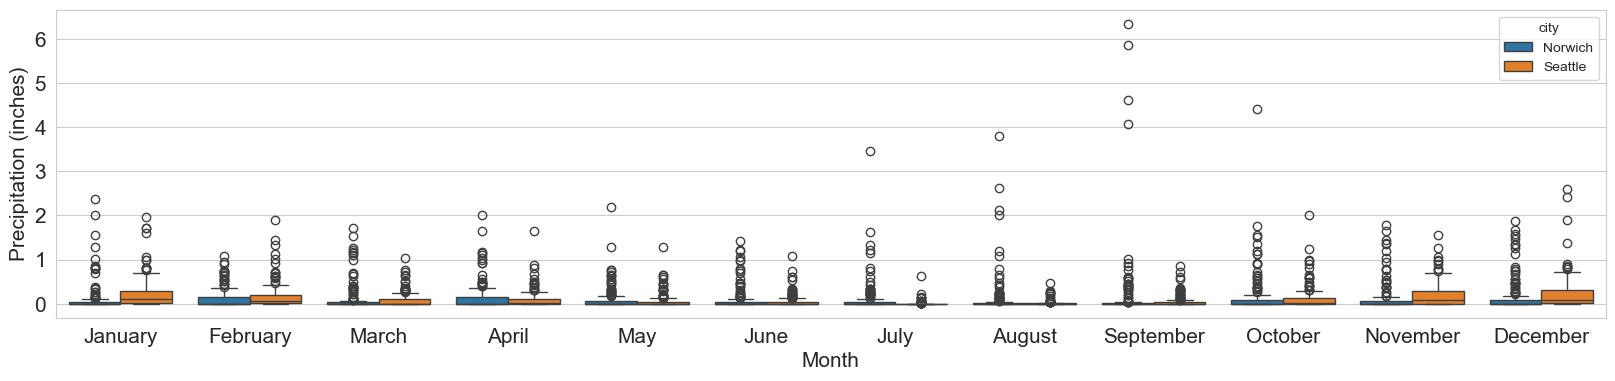

In [58]:
plt.figure(figsize = (20, 4))

sns.boxplot(data = df, x = 'month', y = 'precipitation', hue = 'city')

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)

plt.tick_params(labelsize = 15)

# Set month names as x-axis tick labels
import calendar
month_names = list(calendar.month_name[1:]) # Get month names
plt.xticks(ticks = range(12), labels = month_names) # Set x-axis ticks to month names

plt.show()

This plot shows the outliers really well. It illustrates again that when Norwich gets a lot of rain, it gets a lot more rain than Seattle ever gets. However, it's hard to get an idea of the rest of the data, since the outliers are so different than the rest of the data.

In order to see the rest of the data more clearly, orient the plot horizontally.

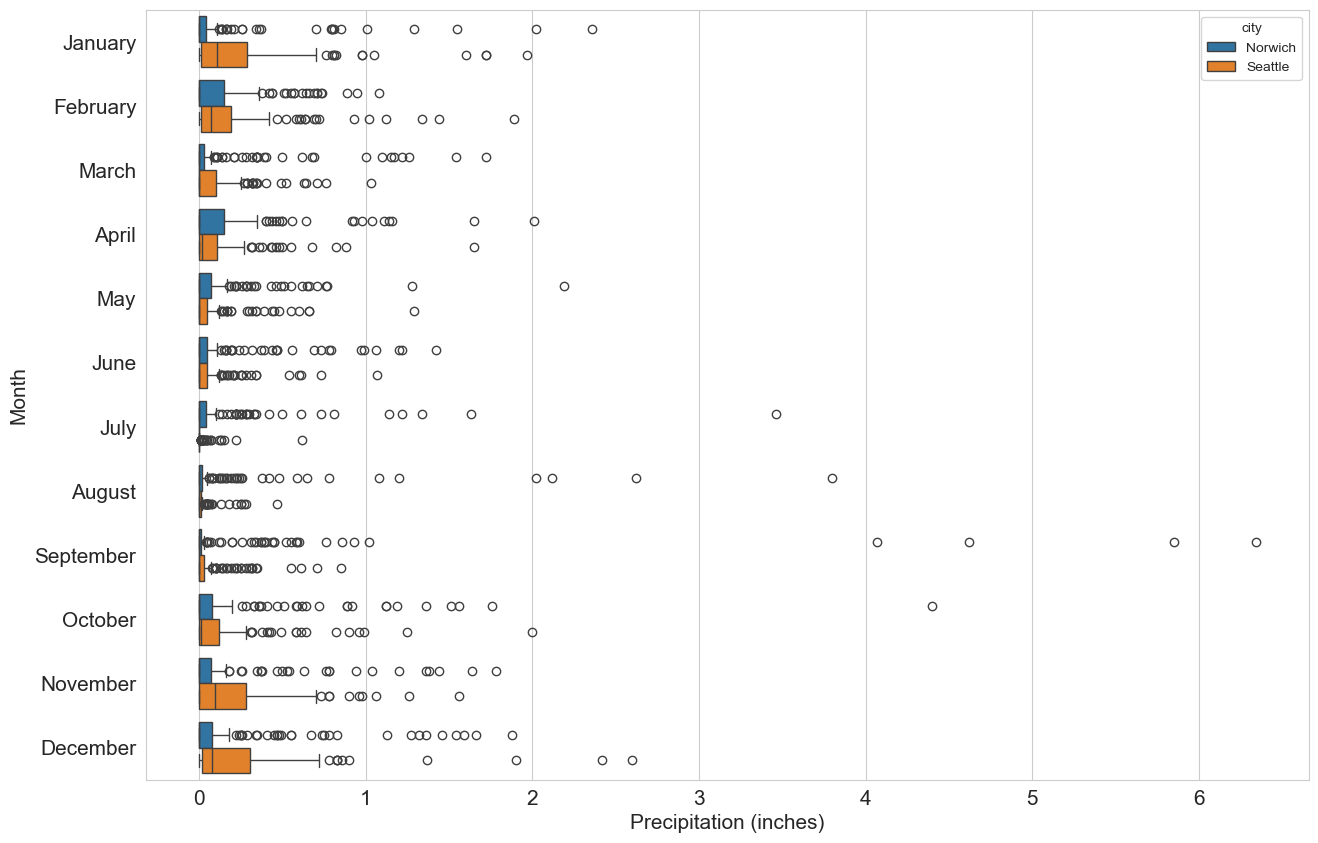

In [61]:
plt.figure(figsize = (15, 10))

sns.boxplot(data = df, x = 'precipitation', y = 'month', hue = 'city', orient = 'h')

plt.xlabel('Precipitation (inches)', fontsize = 15)
plt.ylabel('Month', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.yticks(ticks = range(12), labels = month_names)

plt.show()

This shows the main data (as opposed to mostly just showing outliers) more clearly.

Show another vertical box plot that zooms in on the axis that showing the precipitation.

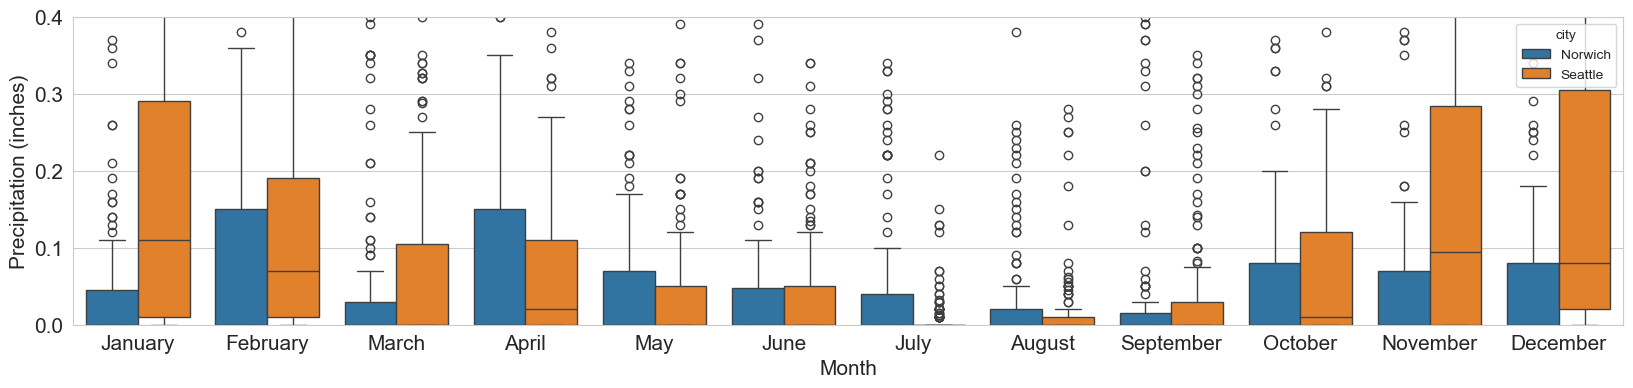

In [62]:
plt.figure(figsize = (20, 4))

sns.boxplot(data = df, x = 'month', y = 'precipitation', hue = 'city')

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.xticks(ticks = range(12), labels = month_names)

plt.ylim(0, 0.4)

plt.show()

This shows the main data more clearly yet.

Create a bar plot that shows the mean precipitation each month.

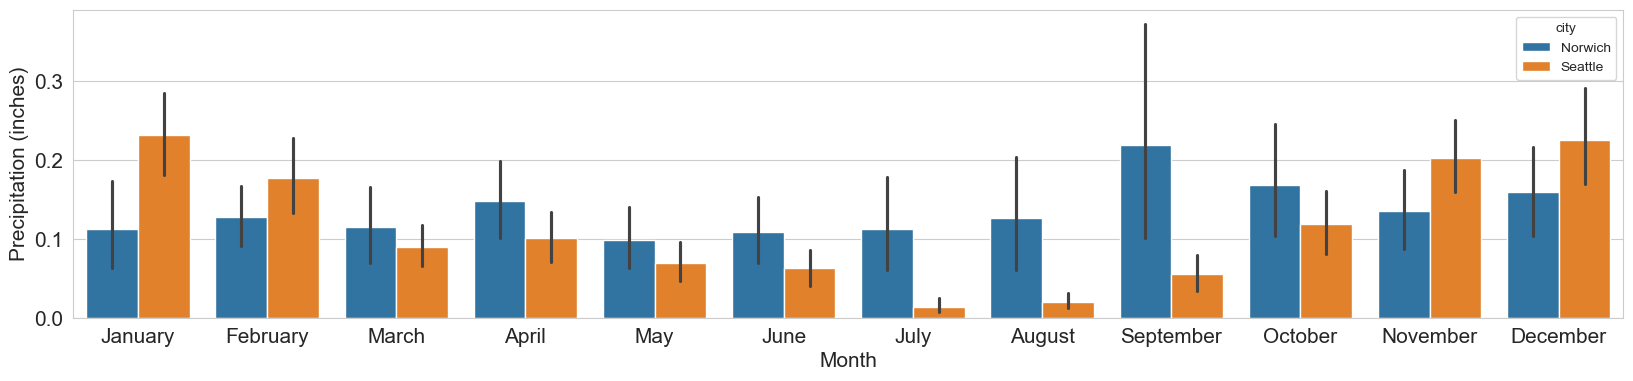

In [64]:
plt.figure(figsize = (20, 4))

sns.barplot(data = df, x = 'month', y = 'precipitation', hue = 'city')

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.xticks(ticks = range(12), labels = month_names)

plt.show()

This shows that some months, in the spring through the fall, Norwich has more rain. Seattle has more rain in the winter.

Compute the mean precipatation by month.

In [65]:
df[['month', 'precipitation', 'city']].groupby(['city', 'month']).mean()

precipitation
city    month               
Norwich 1           0.111935
        2           0.127606
        3           0.115226
        4           0.147867
        5           0.098839
        6           0.108867
        7           0.112065
        8           0.125871
        9           0.219067
        10          0.167935
        11          0.135100
        12          0.159516
Seattle 1           0.230742
        2           0.176472
        3           0.089075
        4           0.100483
        5           0.069161
        6           0.063167
        7           0.013984
        8           0.019995
        9           0.055622
        10          0.118452
        11          0.201867
        12          0.224903

This shows us the same data as the bar chart, but with mean numbers only.

#### Precipitation by Day

Plot the proportion of days with any precipitation.

First, add a variable to the dataframe to indicate whether there was any precipitation. View the first five rows to confirm the column was added.

In [66]:
df['any_precipitation'] = df['precipitation'] > 0
df.head()

,date,city,precipitation,day_of_year,month,any_precipitation
0,2018-01-01,Norwich,0.00,1,1,False
1,2018-01-02,Norwich,0.00,2,1,False
2,2018-01-03,Norwich,0.00,3,1,False
3,2018-01-04,Norwich,0.00,4,1,False
4,2018-01-05,Norwich,0.37,5,1,True


The column appears to have been added correctly. 

Make a bar graph of the proportion of days with any precipitation.

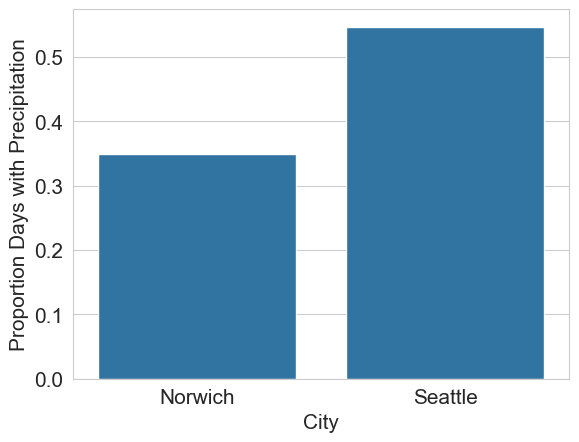

In [67]:
sns.barplot(data = df, x = 'city', y = 'any_precipitation', errorbar = None)

plt.xlabel('City', fontsize = 15)
plt.ylabel('Proportion Days with Precipitation', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.show()

Over half of the days there was some amount of precipitation in Seattle, while over a third of the days there was some amount of precipitation in Norwich.

Plot the proportion of days with precipitation each month.

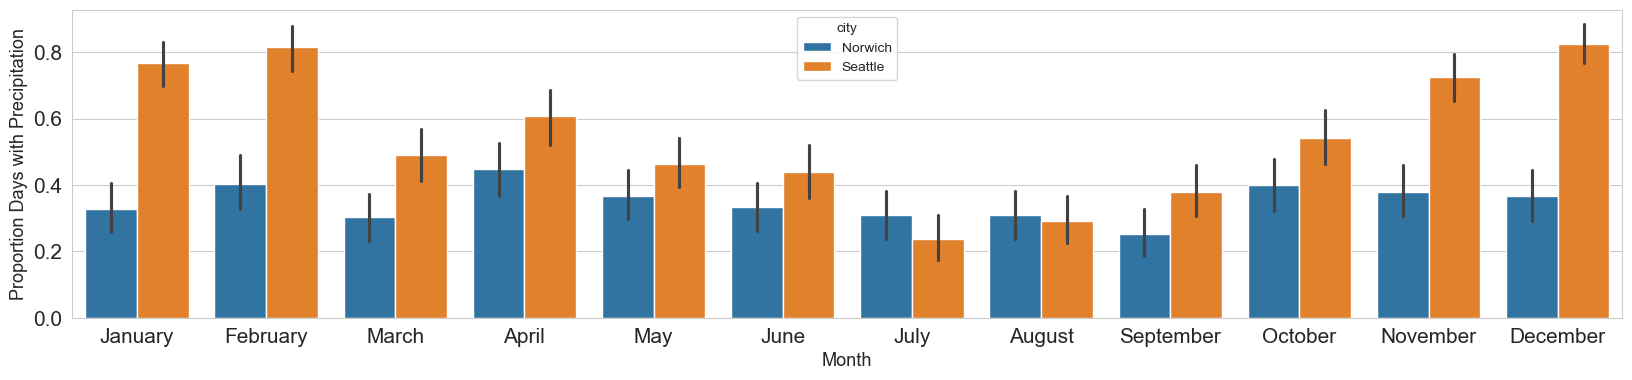

In [68]:
plt.figure(figsize = (20, 4))

sns.barplot(data = df, x = 'month', y = 'any_precipitation', hue = 'city')

plt.xlabel('Month', fontsize = 13)
plt.ylabel('Proportion Days with Precipitation', fontsize = 13)

plt.tick_params(labelsize = 15)

plt.xticks(ticks = range(12), labels = month_names)

plt.show()

There are more days with some amount of rain in Seattle in almost every month, excepting only July and August.

However, as shown earlier, Norwich has more mean daily precipitation than Seattle.

## Analysis

#### Perform a statistical test for differences in the mean precipitation each month between the cities.
The assumption of a t-test is that we are sampling from normal distributions. To check whether we are sampling from normal distributions, we can create a histograms ot examine the distribution of precipitation values of the two cities within a particular month.
Create a histogram.

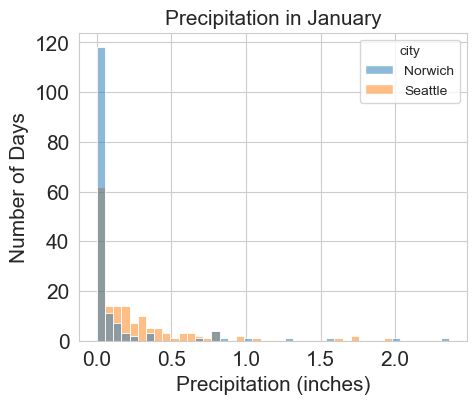

In [72]:
plt.figure(figsize = (5, 4))

sns.histplot(data = df.loc[df['month'] == 1], x = 'precipitation', hue = 'city')

plt.xlabel('Precipitation (inches)', fontsize = 15)
plt.ylabel('Number of Days',  fontsize = 15)
plt.title('Precipitation in January', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.show()

This is not a normal distribution. Rather, it is quite skewed. This does not satisfy the assumptions of a t-test. Because we have such a large number of data points, we can still use a t-test as an approximate test.

Perform the t-test.

In [77]:
from scipy import stats

significance_level = 0.05
significantly_different = np.zeros(12)

# Perform t-test for each month
for month in range(1, 13):
    # Get precipitation data for Seattle and Norwich for the current month
    sea_data = df.loc[(df['city'] == 'Seattle') & (df['month'] == month), 'precipitation']
    nor_data = df.loc[(df['city'] == 'Norwich') & (df['month'] == month), 'precipitation']

    t_statistic, p_value = stats.ttest_ind(sea_data, nor_data, equal_var = False)

    if p_value < significance_level:
        significantly_different[month-1] = 1

    print(f"Month {month}:")
    print(f"   t_statisti = {t_statistic:.2f}")
    print(f"   p_value t test = {p_value:.3f}")
    print("-" * 20)

Month 1:
   t_statisti = 3.08
   p_value t test = 0.002
--------------------
Month 2:
   t_statisti = 1.54
   p_value t test = 0.126
--------------------
Month 3:
   t_statisti = -0.94
   p_value t test = 0.349
--------------------
Month 4:
   t_statisti = -1.55
   p_value t test = 0.122
--------------------
Month 5:
   t_statisti = -1.21
   p_value t test = 0.226
--------------------
Month 6:
   t_statisti = -1.85
   p_value t test = 0.066
--------------------
Month 7:
   t_statisti = -3.31
   p_value t test = 0.001
--------------------
Month 8:
   t_statisti = -2.84
   p_value t test = 0.005
--------------------
Month 9:
   t_statisti = -2.28
   p_value t test = 0.024
--------------------
Month 10:
   t_statisti = -1.14
   p_value t test = 0.256
--------------------
Month 11:
   t_statisti = 1.89
   p_value t test = 0.060
--------------------
Month 12:
   t_statisti = 1.53
   p_value t test = 0.126
--------------------


There is a significant difference in some months but not others.

Plot the mean precipitation each mongh with a star for significant differences.

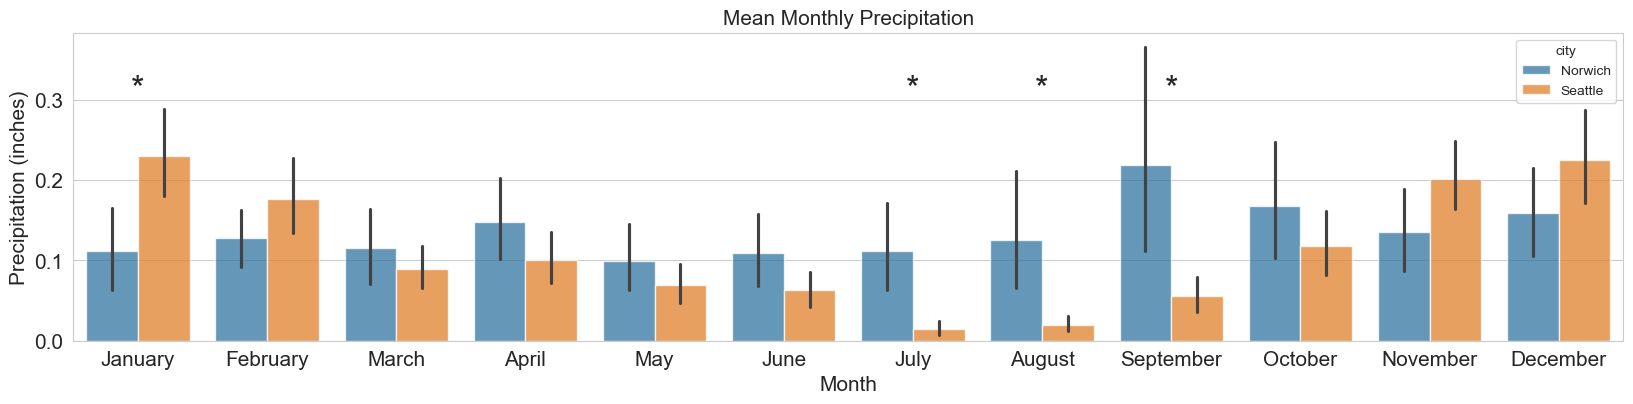

In [78]:
plt.figure(figsize = (20, 4))

sns.barplot(data = df, x = 'month', y = 'precipitation', hue = 'city', alpha = 0.75)

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Precipitation (inches)', fontsize = 15)
plt.title('Mean Monthly Precipitation', fontsize = 15)

plt.tick_params(labelsize = 15)

plt.xticks(ticks = range(12), labels = month_names)

# Add starts for significantly different months
for month in range(12):
    if significantly_different[month] == 1:
        # Add a star
        plt.text(month, 0.3, '*', ha = 'center', fontsize = 25)

plt.show()

There is a significant difference in January, July, August, and September.

#### Perform a statistical test on differences in the proportion of precipitation

Use the proportions z-test to determine whether there's a significant difference in the proportion of days where we see precipitation between the two cities each month.

In [80]:
from statsmodels.stats.proportion import proportions_ztest

significance_level = 0.05
significantly_different_proportion = np.zeros(12)

# Perform t-test for each month
for month in range(1, 13):
    # Create a contingency table for Seattle and Norwich for the current month:
    contingency_table = pd.crosstab(
        df.loc[df['month'] == month, 'city'], df.loc[df['month'] == month, 'any_precipitation']
    )

    # Calculate the number of True values (days with precipitation) for each city
    days_with_precipitation = contingency_table[True]

    # Calculate the total number of days for each city
    total_counts = contingency_table.sum(axis = 1)

    # Hypothesis test
    zstat, p_value = proportions_ztest(
        count = days_with_precipitation, nobs = total_counts, alternative = 'two-sided'
    )

    if p_value < significance_level:
        significantly_different_proportion[month-1] = 1

    print(f"Month {month}:")
    print(f"   z-statistic = {zstat:.2f}")
    print(f"   p_value = {p_value:.3f}")
    print("-" * 20)
    

Month 1:
   z-statistic = -7.76
   p_value = 0.000
--------------------
Month 2:
   z-statistic = -7.08
   p_value = 0.000
--------------------
Month 3:
   z-statistic = -3.37
   p_value = 0.001
--------------------
Month 4:
   z-statistic = -2.78
   p_value = 0.006
--------------------
Month 5:
   z-statistic = -1.73
   p_value = 0.084
--------------------
Month 6:
   z-statistic = -1.90
   p_value = 0.058
--------------------
Month 7:
   z-statistic = 1.40
   p_value = 0.161
--------------------
Month 8:
   z-statistic = 0.37
   p_value = 0.710
--------------------
Month 9:
   z-statistic = -2.36
   p_value = 0.018
--------------------
Month 10:
   z-statistic = -2.50
   p_value = 0.012
--------------------
Month 11:
   z-statistic = -6.04
   p_value = 0.000
--------------------
Month 12:
   z-statistic = -8.22
   p_value = 0.000
--------------------


In some months there is a significant difference, and in some months there is not.

Create a bar plot of the proportions to include a star that shows us in which months we had a significant difference in the proportion.

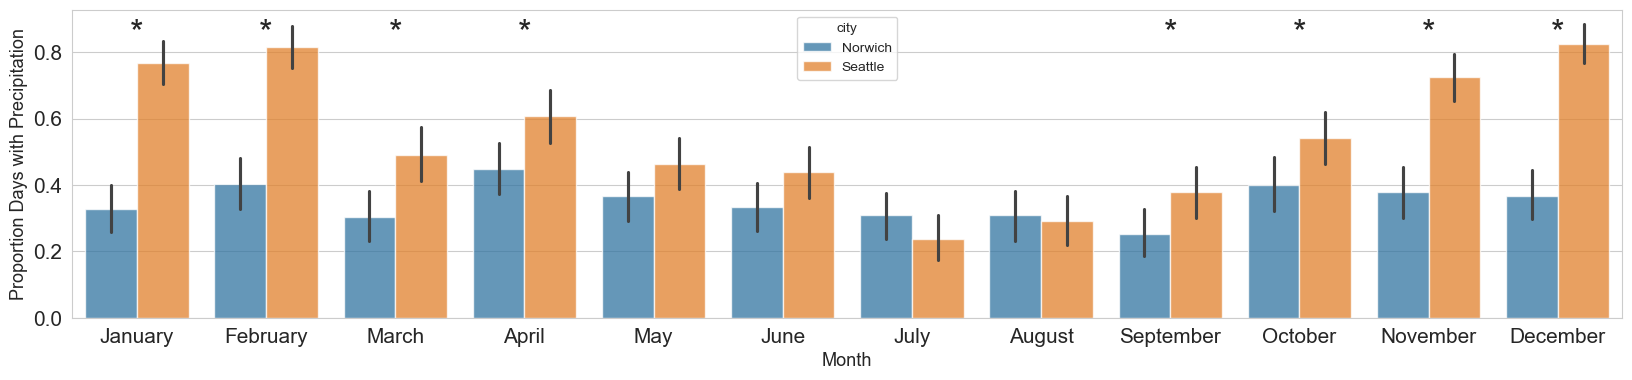

In [81]:
plt.figure(figsize = (20, 4))

sns.barplot(data = df, x = 'month', y = 'any_precipitation', hue = 'city', alpha = 0.75)

plt.xlabel('Month', fontsize = 13)
plt.ylabel('Proportion Days with Precipitation', fontsize = 13)

plt.tick_params(labelsize = 15)

plt.xticks(ticks = range(12), labels = month_names)

# Add stars for significantly different months
for month in range(12):
    if significantly_different_proportion[month] == 1:
        # Add a star
        plt.text(month, 0.825, '*', ha = 'center', fontsize = 25)

plt.show()

This shows that most of the months have a significant difference in the proportion of days with rainfall between the cities. Interestingly, in the only two months where Norwich had a larger proportion of days with rainfall, the rainfall was not significantly different.



While I found that there are a higher proportion of days that it rains in Seattle than there are that it rains in Norwich, the mean monthly precipitation is higher in Norwich than in Seattle for eight months of the year. The mean daily precipitation is also higher in Norwich than in Seattle. 